# Wolrd Bank - Education

**Autor:** *Alejandro Moya*

**GitHub:**

**Datasets:** [Education Statistics](https://datacatalog.worldbank.org/search/dataset/0038480)

**Youtube:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import urllib.request
import os

In [2]:
notebook = os.getcwd()

In [3]:
url = "https://databank.worldbank.org/data/download/EdStats_CSV.zip"
nombre_archivo = "EdStats_CSV.zip"

urllib.request.urlretrieve(url, nombre_archivo)

('EdStats_CSV.zip', <http.client.HTTPMessage at 0x7f2686d137f0>)

In [4]:
PATH_ZIP = os.path.join(notebook,'EdStats_CSV.zip')
PATH_UNZIP = os.path.join(notebook)

In [5]:
with zipfile.ZipFile(PATH_ZIP, 'r') as archivo_zip:
    # Extraer todos los archivos del ZIP en el directorio destino
    archivo_zip.extractall(PATH_UNZIP)

In [6]:
EdStatsCountry_Series = os.path.join(notebook,'EdStatsCountry-Series.csv')
EdStatsCountry = os.path.join(notebook,'EdStatsCountry.csv')
EdStatsData = os.path.join(notebook,'EdStatsData.csv')
EdStatsFootNote = os.path.join(notebook,'EdStatsFootNote.csv')
EdStatsSeries = os.path.join(notebook,'EdStatsSeries.csv')

## Education Statistics Country Series

In [7]:
df_SCS = pd.read_csv(EdStatsCountry_Series)

In [8]:
df_SCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [9]:
df_SCS.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [10]:
df_SCS = df_SCS.drop('Unnamed: 3', axis=1)

In [11]:
df_SCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [12]:
SeriesCode_unique = df_SCS['SeriesCode'].unique()

In [13]:
print(SeriesCode_unique)
print('Code World Bank: ',len(SeriesCode_unique))

['SP.POP.TOTL' 'SP.POP.GROW' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GNP.MKTP.PP.CD' 'NY.GDP.MKTP.PP.CD' 'NY.GDP.PCAP.PP.KD'
 'NY.GNP.PCAP.PP.CD' 'SP.POP.1564.TO.ZS' 'SP.POP.TOTL.MA.ZS'
 'SP.POP.TOTL.FE.ZS' 'SP.POP.0014.TO.ZS' 'NY.GNP.PCAP.CD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.KD' 'SP.POP.1564.MA.IN' 'SP.POP.0014.TO' 'SP.POP.1564.TO'
 'SP.POP.1564.FE.IN' 'SP.POP.0014.MA.IN' 'SP.POP.0014.FE.IN']
Code World Bank:  21


In [14]:
SeriesCode_values_count = df_SCS['SeriesCode'].value_counts()
print(SeriesCode_values_count)

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: SeriesCode, dtype: int64


In [15]:
total_country = df_SCS['CountryCode'].unique()
print(total_country)
print('Total Countries:',len(total_country))

['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'S

In [16]:
description = df_SCS['DESCRIPTION'].unique()
print('Total Descriptions', len(description))

Total Descriptions 97


Se afirma que existen un total de 211 países, con 21 códigos agregados por el Banco Mundial y un total de 97 descripciones diferentes.

Se seleccionarán únicamente Finlandia y Ecuador como referencia en este proceso para limitar el alcance del proyecto.

In [17]:
df_SCS = df_SCS[(df_SCS['CountryCode'] == 'ECU') | (df_SCS['CountryCode'] == 'FIN')]



In [18]:
df_SCS.head()

CountryCode   SeriesCode  \
144         ECU  SP.POP.GROW   
145         ECU  SP.POP.TOTL   
162         FIN  SP.POP.GROW   
163         FIN  SP.POP.TOTL   

                                           DESCRIPTION  
144  Data sources: United Nations World Population ...  
145  Data sources : United Nations World Population...  
162                            Data sources : Eurostat  
163                            Data sources : Eurostat

In [19]:
SeriesCode_unique = df_SCS['SeriesCode'].unique()
print(SeriesCode_unique)
print('Code World Bank: ',len(SeriesCode_unique))

['SP.POP.GROW' 'SP.POP.TOTL']
Code World Bank:  2


In [20]:
SeriesCode_values_count = df_SCS['SeriesCode'].value_counts()
print(SeriesCode_values_count)

SP.POP.GROW    2
SP.POP.TOTL    2
Name: SeriesCode, dtype: int64


In [21]:
total_country = df_SCS['CountryCode'].unique()
print(total_country)
print('Total Countries:',len(total_country))

['ECU' 'FIN']
Total Countries: 2


In [22]:
description = df_SCS['DESCRIPTION'].unique()
print('Total Descriptions', len(description))

Total Descriptions 3


Finalmente, después de eliminar 209 países, nos quedamos únicamente con 2 países que, a su vez, comparten un total de 3 descripciones diferentes y se utilizan tan solo 2 etiquetas del Banco Mundial para describirlos.

## Education Statistics Country

In [23]:
df_SC = pd.read_csv(EdStatsCountry)

In [24]:
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [25]:
df_SC.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [26]:
df_SC = df_SC.drop('Unnamed: 31', axis=1)

In [27]:
df_SC = df_SC[(df_SC['Country Code'] == 'ECU') | (df_SC['Country Code'] == 'FIN')]

In [28]:
df_SC.head()

Country Code Short Name Table Name            Long Name 2-alpha code  \
61          ECU    Ecuador    Ecuador  Republic of Ecuador           EC   
69          FIN    Finland    Finland  Republic of Finland           FI   

   Currency Unit                                      Special Notes  \
61   U.S. dollar  National accounts have been revised from 1965 ...   
69          Euro  A simple multiplier is used to convert the nat...   

                       Region         Income Group WB-2 code  ...  \
61  Latin America & Caribbean  Upper middle income        EC  ...   
69      Europe & Central Asia    High income: OECD        FI  ...   

      Government Accounting concept  \
61     Budgetary central government   
69  Consolidated central government   

               IMF data dissemination standard Latest population census  \
61  Special Data Dissemination Standard (SDDS)                     2010   
69  Special Data Dissemination Standard (SDDS)                     2010   

                   Latest household survey  \
61  Reproductive Health Survey (RHS), 2004   
69                                     NaN   

   Source of most recent Income and expenditure data  \
61           Integrated household survey (IHS), 2012   
69                          Income survey (IS), 2000   

   Vital registration complete Latest agricultural census  \
61                         NaN                    2013/15   
69                         Yes                       2010   

   Latest industrial data Latest trade data Latest water withdrawal data  
61                 2008.0            2012.0                         2005  
69                 2009.0            2012.0                         2005  

[2 rows x 31 columns]

In [29]:
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 61 to 69
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       2 non-null      object 
 1   Short Name                                         2 non-null      object 
 2   Table Name                                         2 non-null      object 
 3   Long Name                                          2 non-null      object 
 4   2-alpha code                                       2 non-null      object 
 5   Currency Unit                                      2 non-null      object 
 6   Special Notes                                      2 non-null      object 
 7   Region                                             2 non-null      object 
 8   Income Group                                       2 non-null      object 
 9   WB-2 code   

El DataFrame tiene 30 columnas con diferentes tipos de datos.

1. Country Code: Código del país (tipo de dato: objeto).
2. Short Name: Nombre corto del país (tipo de dato: objeto).
3. Table Name: Nombre de la tabla (tipo de dato: objeto).
4. Long Name: Nombre largo del país (tipo de dato: objeto).
5. 2-alpha code: Código alfanumérico de 2 caracteres del país (tipo de dato: objeto).
6. Currency Unit: Unidad monetaria del país (tipo de dato: objeto).
7. Special Notes: Notas especiales (tipo de dato: objeto).
8. Region: Región del país (tipo de dato: objeto).
9. Income Group: Grupo de ingresos al que pertenece el país (tipo de dato: objeto).
10. WB-2 code: Código de 2 caracteres del país (tipo de dato: objeto).
11. National accounts base year: Año base de las cuentas nacionales (tipo de dato: objeto).
12. National accounts reference year: Año de referencia de las cuentas nacionales (tipo de dato: float64).
13. SNA price valuation: Valoración de precios según el SNA (tipo de dato: objeto).
14. Lending category: Categoría de préstamo (tipo de dato: objeto).
15. Other groups: Otros grupos (tipo de dato: objeto).
16. System of National Accounts: Sistema de Cuentas Nacionales (tipo de dato: objeto).
17. Alternative conversion factor: Factor de conversión alternativo (tipo de dato: objeto).
18. PPP survey year: Año de la encuesta de Paridad de Poder Adquisitivo (tipo de dato: objeto).
19. Balance of Payments Manual in use: Manual de Balanza de Pagos utilizado (tipo de dato: objeto).
20. External debt Reporting status: Estado de reporte de la deuda externa (tipo de dato: objeto).
21. System of trade: Sistema de comercio (tipo de dato: objeto).
22. Government Accounting concept: Concepto de contabilidad gubernamental (tipo de dato: objeto).
23. IMF data dissemination standard: Estándar de diseminación de datos del FMI (tipo de dato: objeto).
24. Latest population census: Último censo de población (tipo de dato: objeto).
25. Latest household survey: Última encuesta de hogares (tipo de dato: objeto).
26. Source of most recent Income and expenditure data: Fuente de los datos más recientes de ingresos y gastos (tipo de dato: objeto).
27. Vital registration complete: Registro vital completo (tipo de dato: objeto).
28. Latest agricultural census: Último censo agrícola (tipo de dato: objeto).
29. Latest industrial data: Últimos datos industriales (tipo de dato: float64).
30. Latest trade data: Últimos datos comerciales (tipo de dato: float64).

Esta descripción ayuda a comprender mejor las columnas y los tipos de datos presentes en el DataFrame.

## Education Statistics Foot Note

In [30]:
df_FN = pd.read_csv(EdStatsFootNote)

In [31]:
df_FN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [32]:
df_FN = df_FN.drop('Unnamed: 4', axis=1)

In [33]:
df_FN.head()

CountryCode      SeriesCode    Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.

In [34]:
df_FN = df_FN[(df_FN['CountryCode'] == 'ECU') | (df_FN['CountryCode'] == 'FIN')]


In [35]:
df_FN['Year'] = df_FN['Year'].str.extract(r'(\d+)').astype(int)

In [36]:
df_FN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6910 entries, 164309 to 194049
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  6910 non-null   object
 1   SeriesCode   6910 non-null   object
 2   Year         6910 non-null   int64 
 3   DESCRIPTION  6910 non-null   object
dtypes: int64(1), object(3)
memory usage: 269.9+ KB


In [37]:
len(df_FN['DESCRIPTION'].unique())

135

In [38]:
len(df_FN['SeriesCode'].unique())

520

Se observa que el Banco Mundial clasifica la información sobre Ecuador en 486 factores o combinaciones de varios factores, además de especificar 75 descripciones.

In [39]:
df_FN.head()

CountryCode          SeriesCode  Year  \
164309         ECU         SH.DYN.MORT  1977   
164310         ECU    UIS.EA.5.AG25T99  2014   
164311         ECU  UIS.EA.5.AG25T99.F  2014   
164312         ECU  UIS.EA.5.AG25T99.M  2014   
164313         ECU      SH.DYN.AIDS.ZS  2015   

                                              DESCRIPTION  
164309                    Uncertainty bound is 97 - 116.6  
164310  Percentage includes post-secondary non-tertiar...  
164311  Percentage includes post-secondary non-tertiar...  
164312  Percentage includes post-secondary non-tertiar...  
164313                         Plausible bound is 0.2-0.4

In [40]:
df_FN['Year'].unique()

array([1977, 2014, 2015, 2016, 2009, 2010, 2011, 2012, 2013, 2003, 2004,
       2005, 2006, 2007, 2008, 1997, 1998, 1999, 2000, 2001, 2002, 1996,
       1995, 1987, 1985, 1983, 1971, 1974, 1994, 1975, 1986, 1993, 1991,
       1972, 1973, 1976, 1978, 1979, 1980, 1981, 1984, 1988, 1982, 1989,
       1990, 1992, 1970, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050])

El rango de los valores de aprecioacion se mantienen entre 1970 hasta el 2017

In [41]:
len(df_FN['CountryCode'].unique())

2

## Education Statistics Series

In [42]:
df_SS = pd.read_csv(EdStatsSeries)

In [43]:
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

El presente dataset tiene como objetivo ilustrar la informacion de cada una de las etiquetas su periosidad, links, el nombre del indicador y definiciones.

In [44]:
df_SS.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

Para este caso en particular se considerararan exclusivamente los codigos de serie de los paso anteriores, es decir:



1.   SP.POP.GROW    2
2.   SP.POP.TOTL    2


Que son las etiquetas orotgadas a Ecuador y Finlandia.

In [45]:
drop_col = ['Unit of measure','Notes from original source',
            'Other web links','Related indicators','License Type',
            'Unnamed: 20']

df_SS = df_SS.drop(drop_col, axis=1)

In [46]:
df_SS = df_SS[(df_SS['Series Code'] == 'SP.POP.GROW') | (df_SS['Series Code'] == 'SP.POP.TOTL')]


In [47]:
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2589 to 2590
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          2 non-null      object
 1   Topic                                2 non-null      object
 2   Indicator Name                       2 non-null      object
 3   Short definition                     1 non-null      object
 4   Long definition                      2 non-null      object
 5   Periodicity                          2 non-null      object
 6   Base Period                          0 non-null      object
 7   Other notes                          0 non-null      object
 8   Aggregation method                   2 non-null      object
 9   Limitations and exceptions           1 non-null      object
 10  General comments                     1 non-null      object
 11  Source                               2 non-

In [48]:
df_SS.head()

Series Code                          Topic  \
2589  SP.POP.GROW   Health: Population: Dynamics   
2590  SP.POP.TOTL  Health: Population: Structure   

                    Indicator Name  \
2589  Population growth (annual %)   
2590             Population, total   

                                       Short definition  \
2589  Annual population growth rate. Population is b...   
2590                                                NaN   

                                        Long definition Periodicity  \
2589  Annual population growth rate for year t is th...      Annual   
2590  Total population is based on the de facto defi...      Annual   

     Base Period Other notes Aggregation method  \
2589         NaN         NaN   Weighted average   
2590         NaN         NaN                Sum   

                             Limitations and exceptions  \
2589                                                NaN   
2590  Current population estimates for developing co...   

                                       General comments  \
2589                                                NaN   
2590  Relevance to gender indicator: disaggregating ...   

                                                 Source  \
2589  Derived from total population. Population sour...   
2590  (1) United Nations Population Division. World ...   

     Statistical concept and methodology Development relevance  \
2589                                 NaN                   NaN   
2590                                 NaN                   NaN   

     Related source links  
2589                  NaN  
2590                  NaN

Los dos indicadores demográficos clave proporcionados por el Banco Mundial: la tasa de crecimiento de la población (SP.POP.GROW) y la población total (SP.POP.TOTL).

El indicador SP.POP.GROW, que representa la tasa anual de crecimiento poblacional expresada como un porcentaje, mostró un valor de 2. Este dato sugiere que la población de la región o país analizado está creciendo a una tasa del 2% por año. Para una evaluación completa, sería pertinente comparar este valor con tasas de crecimiento de periodos anteriores o de otras regiones o países, con el objetivo de identificar tendencias y patrones en el crecimiento poblacional.

Además, sería relevante explorar los factores que podrían estar correlacionados con esta tasa de crecimiento. Por ejemplo, se podría investigar si este crecimiento poblacional está asociado a eventos históricos, políticas específicas o relacionado con indicadores socioeconómicos como el Producto Interno Bruto (PIB) o el Índice de Desarrollo Humano (IDH).

Por otro lado, el indicador SP.POP.TOTL, que representa la población total de un país o región, mostró un valor de 2. Este valor, siendo notablemente bajo, podría indicar una población excepcionalmente pequeña o, alternativamente, un error en la recopilación o reporte de los datos.

De manera similar a la tasa de crecimiento, en un análisis descriptivo de este indicador, se podría considerar cómo el tamaño total de esta población se compara con otros periodos de tiempo o con otras regiones o países. En términos exploratorios, podría ser interesante investigar los factores que podrían estar correlacionados con el tamaño de la población. Estos factores podrían ser geográficos, económicos, políticos o socioeconómicos.

Es esencial subrayar que cualquier análisis de estos indicadores requiere una cuidadosa consideración de la calidad y fiabilidad de los datos, así como el contexto en el que fueron recopilados. Es imprescindible confirmar la confiabilidad de los datos y asegurarse de que estos sean representativos de la población que se está estudiando. Adicionalmente, es importante verificar que los datos son comparables a lo largo del tiempo y entre diferentes regiones o países.

# Education Statistics Data

In [49]:
df = pd.read_csv(EdStatsData)

Este dataframe contine la inforacion relevante, agrupada e indexada de cada una de los paises. Es precisamente sobre esta que se desarrollara toda la Analitica Descriptiva.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [51]:
df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [52]:
df = df.drop('Unnamed: 69', axis=1)

El analisis esta centrado en Ecuador y tomara a Finlandia como referencia (Pais mas feliz del mundo)

In [53]:
df = df[(df['Country Code'] == 'ECU') | (df['Country Code'] == 'FIN')]


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7330 entries, 300530 to 337179
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7330 non-null   object 
 1   Country Code    7330 non-null   object 
 2   Indicator Name  7330 non-null   object 
 3   Indicator Code  7330 non-null   object 
 4   1970            840 non-null    float64
 5   1971            503 non-null    float64
 6   1972            466 non-null    float64
 7   1973            448 non-null    float64
 8   1974            441 non-null    float64
 9   1975            1185 non-null   float64
 10  1976            464 non-null    float64
 11  1977            472 non-null    float64
 12  1978            477 non-null    float64
 13  1979            512 non-null    float64
 14  1980            1153 non-null   float64
 15  1981            350 non-null    float64
 16  1982            377 non-null    float64
 17  1983            349 non-nu

Por la forma en la que estan descritos los numeros en las columnas que contienen flotantes y numericos con presentacion de "." para separador de miles, es necesario que se lea como string para luego realizar las correcciones propias.

In [55]:
def modificar_valor(valor):
    # Verificar si el valor es NaN
    if pd.isna(valor):
        return valor



    # Verificar si el valor es menor a 1 o comienza con 0.
    if float(valor) < 1:
        return  str(valor)
    else:
         # Convertir el valor a cadena y eliminar el punto decimal
        valor_str = str(valor).replace('.', '')
        # Calcular el número de decimales
        num_decimales = len(valor_str) - len(str(int(valor)))

        # Multiplicar el valor por la potencia de 10 para restaurar los decimales
        valor_entero = int(valor * (10 ** num_decimales))
        return str(valor_entero)




In [56]:
df['1970'] = df['1970'].apply(modificar_valor)

In [57]:
df.head()

Country Name Country Code  \
300530      Ecuador          ECU   
300531      Ecuador          ECU   
300532      Ecuador          ECU   
300533      Ecuador          ECU   
300534      Ecuador          ECU   

                                           Indicator Name  Indicator Code  \
300530  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
300531  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
300532  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
300533  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
300534  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

       1970  1971  1972  1973  1974  1975  ...  2055  2060  2065  2070  2075  \
300530  NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
300531  NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
300532  NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
300533  NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
300534  NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   

        2080  2085  2090  2095  2100  
300530   NaN   NaN   NaN   NaN   NaN  
300531   NaN   NaN   NaN   NaN   NaN  
300532   NaN   NaN   NaN   NaN   NaN  
300533   NaN   NaN   NaN   NaN   NaN  
300534   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

Aplicacmos la funcion, en todas las columnas entre 1970 y 2100

Este dataframe contiene las proyeccciones hasta el 2100

In [58]:
columnas_excluidas = df.columns[:4]

In [59]:
df.iloc[:, 4:] = df.iloc[:, 4:].applymap(modificar_valor)

In [60]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [61]:
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

In [62]:
df.fillna(0, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7330 entries, 300530 to 337179
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7330 non-null   object 
 1   Country Code    7330 non-null   object 
 2   Indicator Name  7330 non-null   object 
 3   Indicator Code  7330 non-null   object 
 4   1970            7330 non-null   object 
 5   1971            7330 non-null   object 
 6   1972            7330 non-null   object 
 7   1973            7330 non-null   object 
 8   1974            7330 non-null   object 
 9   1975            7330 non-null   object 
 10  1976            7330 non-null   object 
 11  1977            7330 non-null   object 
 12  1978            7330 non-null   object 
 13  1979            7330 non-null   object 
 14  1980            7330 non-null   object 
 15  1981            7330 non-null   object 
 16  1982            7330 non-null   object 
 17  1983            7330 non-n

In [64]:
columnas_numericas = df.columns[4:]

for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7330 entries, 300530 to 337179
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7330 non-null   object 
 1   Country Code    7330 non-null   object 
 2   Indicator Name  7330 non-null   object 
 3   Indicator Code  7330 non-null   object 
 4   1970            7330 non-null   float64
 5   1971            7330 non-null   float64
 6   1972            7330 non-null   float64
 7   1973            7330 non-null   float64
 8   1974            7330 non-null   float64
 9   1975            7330 non-null   float64
 10  1976            7330 non-null   float64
 11  1977            7330 non-null   float64
 12  1978            7330 non-null   float64
 13  1979            7330 non-null   float64
 14  1980            7330 non-null   float64
 15  1981            7330 non-null   float64
 16  1982            7330 non-null   float64
 17  1983            7330 non-n

In [66]:
df.describe()

1970          1971          1972          1973          1974  \
count  7.330000e+03  7.330000e+03  7.330000e+03  7.330000e+03  7.330000e+03   
mean   1.164571e+12  1.390168e+13  1.154503e+13  1.171121e+13  1.152415e+13   
std    2.311581e+13  9.007681e+13  8.165027e+13  8.311166e+13  8.281325e+13   
min   -3.787182e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    8.463532e+14  9.964490e+14  9.893870e+14  9.984947e+14  9.850930e+14   

               1975          1976          1977          1978          1979  \
count  7.330000e+03  7.330000e+03  7.330000e+03  7.330000e+03  7.330000e+03   
mean   1.440234e+13  1.445646e+13  1.357889e+13  1.411079e+13  1.433867e+13   
std    9.497222e+13  9.515030e+13  9.061316e+13  9.523472e+13  9.305318e+13   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    9.928610e+14  9.970250e+14  9.955640e+14  9.987630e+14  9.941530e+14   

       ...           2055           2060           2065           2070  \
count  ...    7330.000000    7330.000000    7330.000000    7330.000000   
mean   ...     691.881079     757.487538     608.702401     685.482733   
std    ...   13859.971240   14876.834021   13105.081690   15282.679210   
min    ...      -0.650000      -0.580000      -0.510000      -0.450000   
25%    ...       0.000000       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000       0.000000   
75%    ...       0.000000       0.000000       0.000000       0.000000   
max    ...  700157.000000  760874.000000  818706.000000  872494.000000   

                2075           2080          2085          2090          2095  \
count    7330.000000    7330.000000  7.330000e+03  7.330000e+03  7.330000e+03   
mean      771.895978     757.020237  7.254326e+02  7.583969e+02  7.008107e+02   
std     16695.633307   17136.049560  1.714447e+04  1.785605e+04  1.700165e+04   
min        -0.380000      -0.310000 -2.400000e-01 -1.900000e-01 -1.400000e-01   
25%         0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%         0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%         0.000000       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
max    921020.000000  963718.000000  1.000602e+06  1.031993e+06  1.057848e+06   

               2100  
count  7.330000e+03  
mean   6.306110e+02  
std    1.669856e+04  
min   -1.000000e-01  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.078093e+06  

[8 rows x 65 columns]

### Agrupamos por cada Pais

In [67]:
import matplotlib.pyplot as plt

In [68]:
years = df.columns[4:]  # Selecciona todas las columnas a partir de la cuarta columna (1970 en adelante)
data = df.iloc[:, 4:]  # Selecciona todas las filas a partir de la cuarta columna (1970 en adelante)

In [69]:
data_filled = data.fillna(0)
data_sum = data_filled.sum()

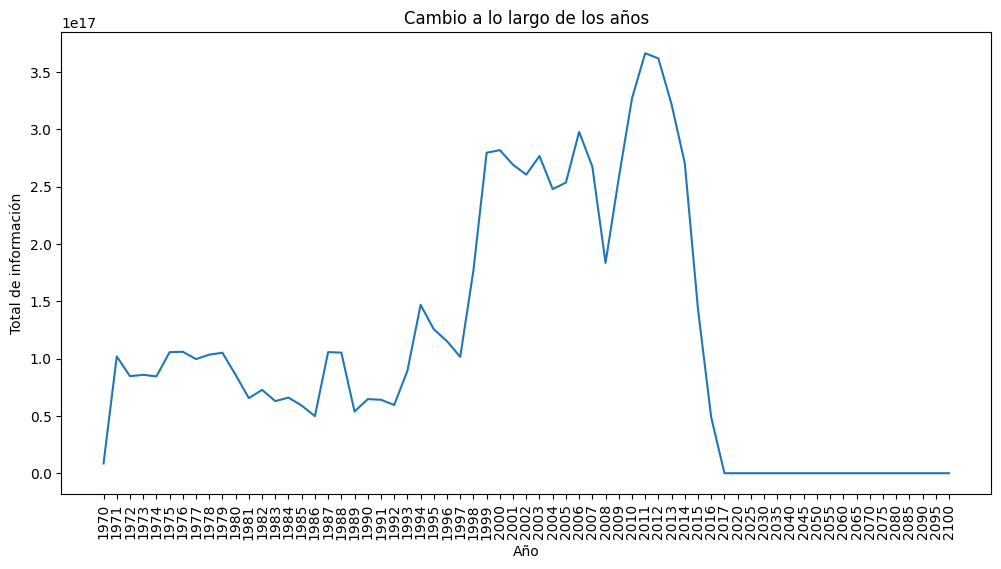

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(years, data_sum)

# Personaliza el título y las etiquetas de los ejes
plt.title('Cambio a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Total de información')
plt.xticks(rotation=90)
# Muestra el gráfico
plt.show()


Una matriz de correlación de Pearson es una herramienta estadística que se utiliza para evaluar la relación lineal entre pares de variables. Esta matriz muestra los coeficientes de correlación de Pearson entre todas las combinaciones posibles de variables en un conjunto de datos. Cada coeficiente de correlación de Pearson varía entre -1 y 1, donde:

- Un valor de 1 indica una correlación positiva perfecta, lo que significa que las variables están linealmente relacionadas en una dirección positiva.
- Un valor de -1 indica una correlación negativa perfecta, lo que significa que las variables están linealmente relacionadas en una dirección negativa.
- Un valor de 0 indica que no hay correlación lineal entre las variables.

La matriz de correlación de Pearson es útil porque proporciona una visión general de las relaciones entre todas las variables en un conjunto de datos. Al analizar esta matriz, se pueden identificar patrones y tendencias de correlación entre variables, lo que puede ayudar a comprender mejor la estructura y las interacciones dentro de los datos.

<ipython-input-71-3048fe70fc76>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


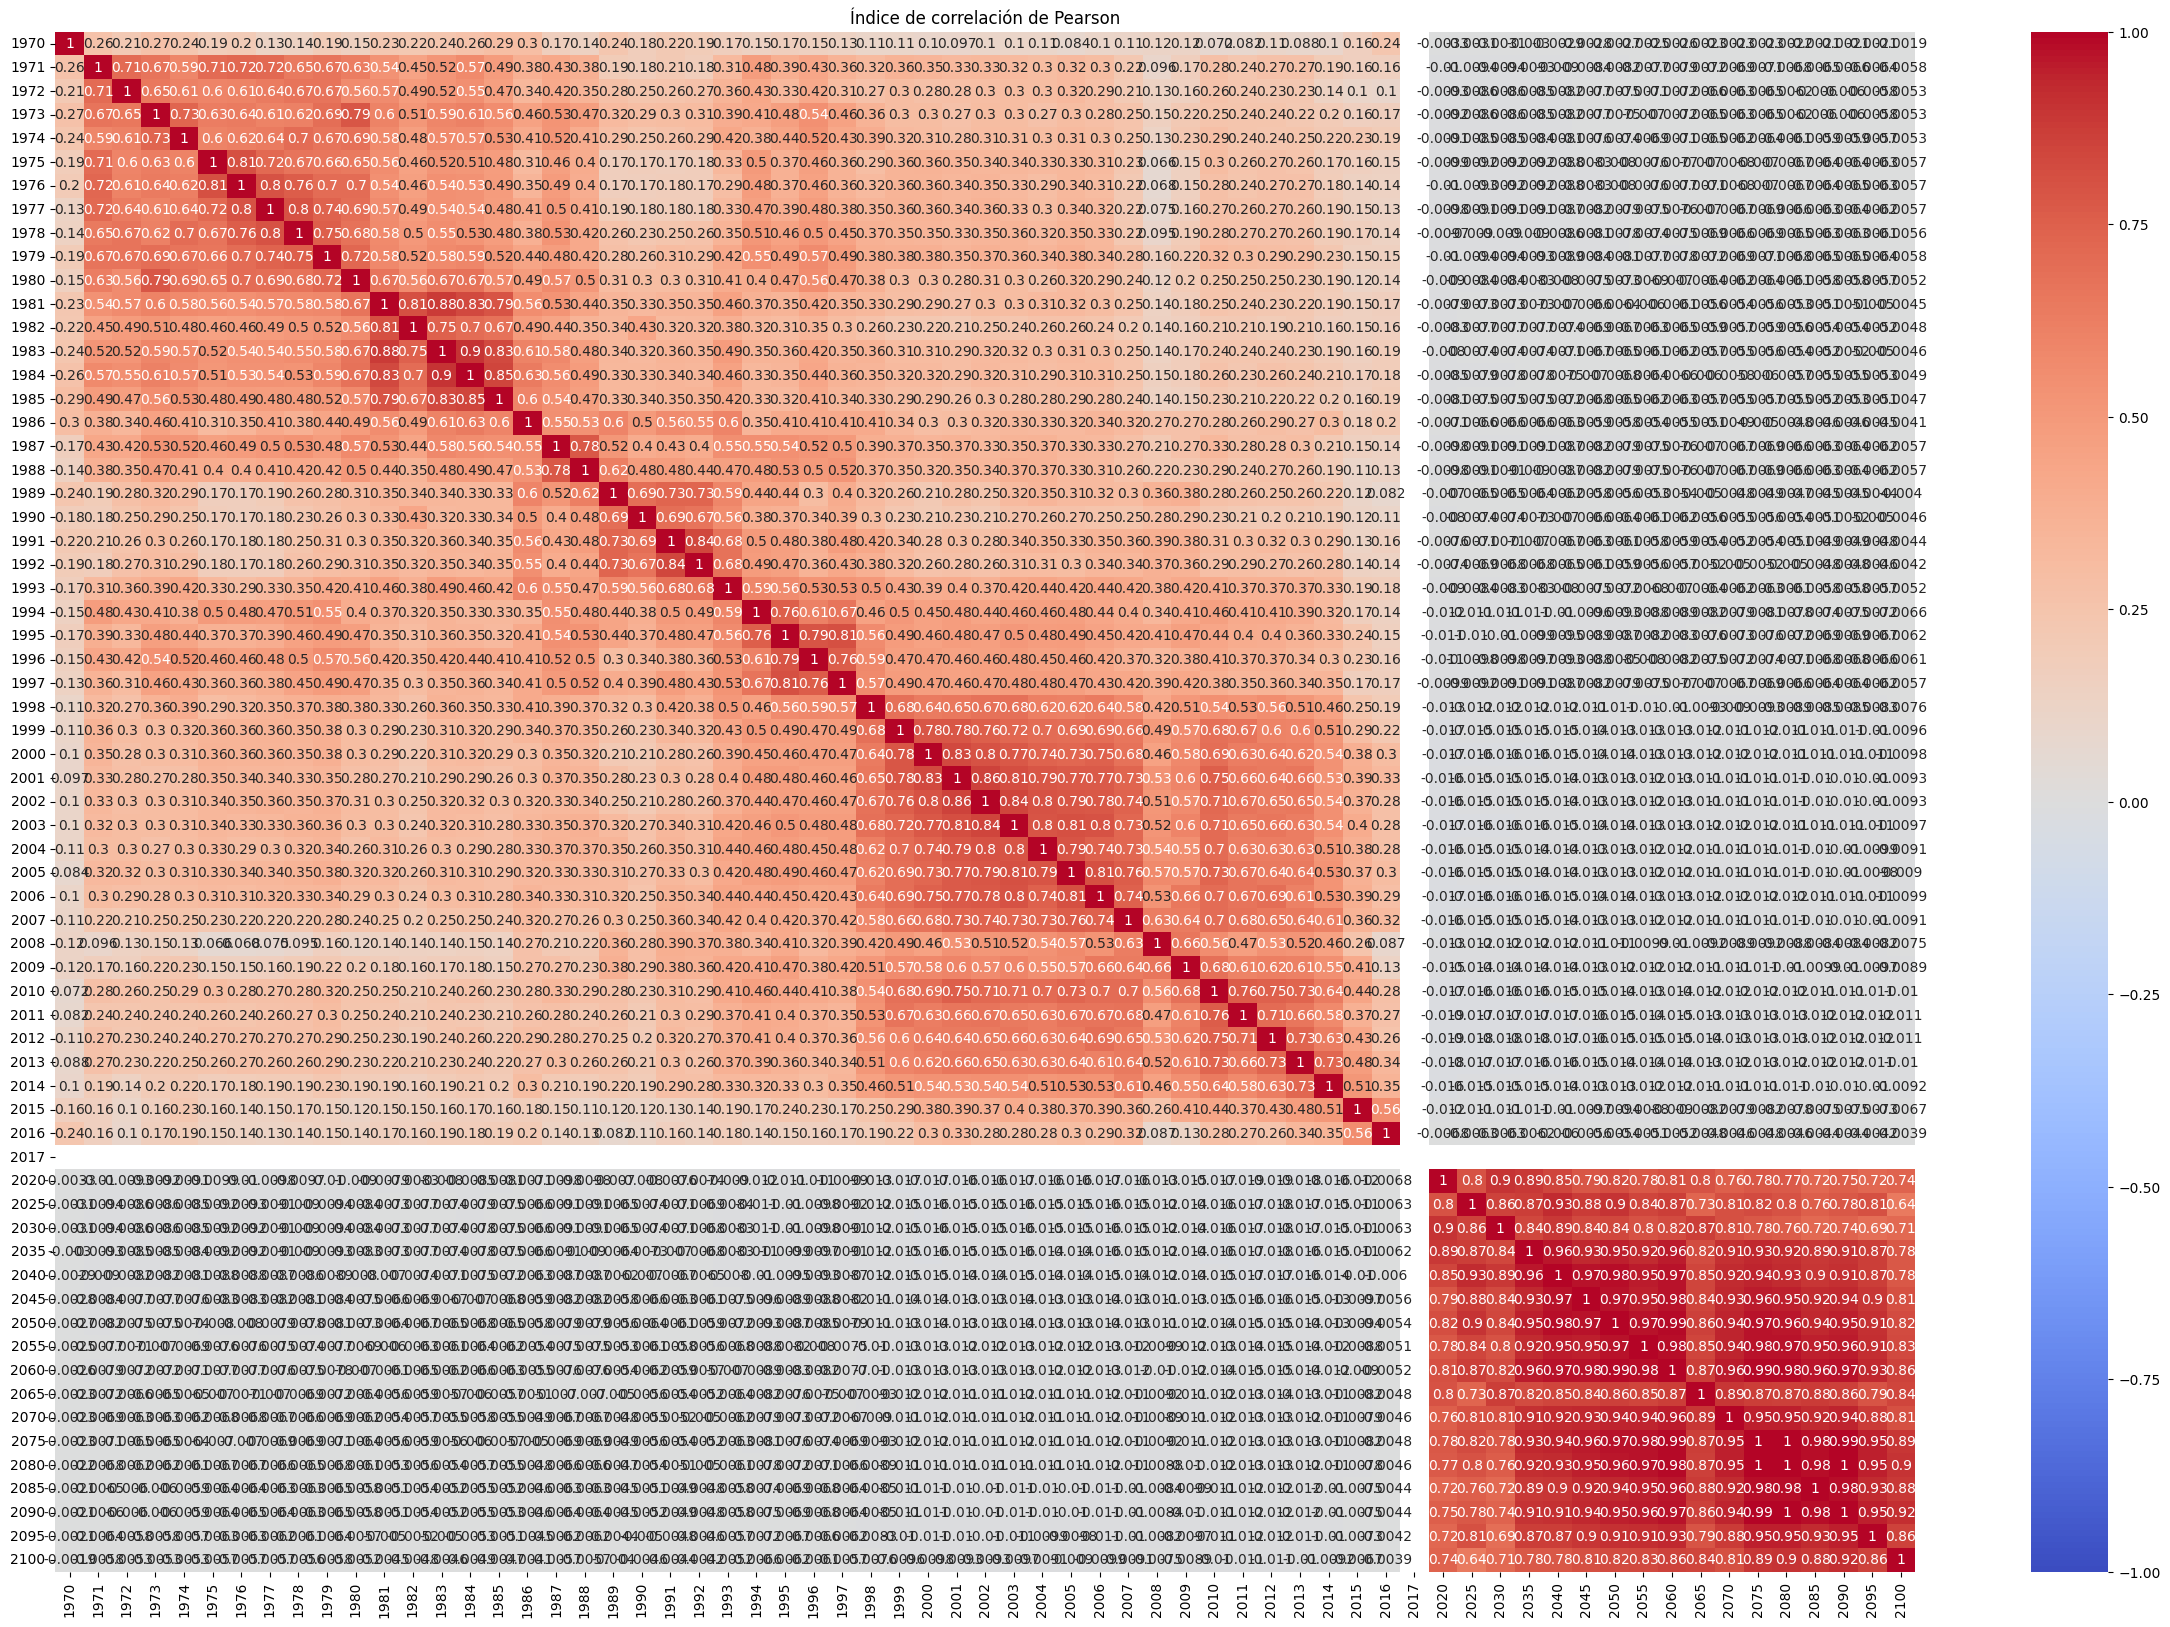

In [71]:
import pandas as pd
import seaborn as sns


# Calcula el índice de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Genera un mapa de calor para visualizar el índice de correlación
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Índice de correlación de Pearson')
plt.show()


## EDA

Analisis Exploratorio de Datos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7330 entries, 300530 to 337179
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7330 non-null   object 
 1   Country Code    7330 non-null   object 
 2   Indicator Name  7330 non-null   object 
 3   Indicator Code  7330 non-null   object 
 4   1970            7330 non-null   float64
 5   1971            7330 non-null   float64
 6   1972            7330 non-null   float64
 7   1973            7330 non-null   float64
 8   1974            7330 non-null   float64
 9   1975            7330 non-null   float64
 10  1976            7330 non-null   float64
 11  1977            7330 non-null   float64
 12  1978            7330 non-null   float64
 13  1979            7330 non-null   float64
 14  1980            7330 non-null   float64
 15  1981            7330 non-null   float64
 16  1982            7330 non-null   float64
 17  1983            7330 non-n

In [73]:
df.head()

Country Name Country Code  \
300530      Ecuador          ECU   
300531      Ecuador          ECU   
300532      Ecuador          ECU   
300533      Ecuador          ECU   
300534      Ecuador          ECU   

                                           Indicator Name  Indicator Code  \
300530  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
300531  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
300532  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
300533  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
300534  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970  1971  1972  1973  1974  1975  ...  2055  2060  2065  2070  2075  \
300530   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
300531   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
300532   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
300533   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
300534   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   

        2080  2085  2090  2095  2100  
300530   0.0   0.0   0.0   0.0   0.0  
300531   0.0   0.0   0.0   0.0   0.0  
300532   0.0   0.0   0.0   0.0   0.0  
300533   0.0   0.0   0.0   0.0   0.0  
300534   0.0   0.0   0.0   0.0   0.0  

[5 rows x 69 columns]

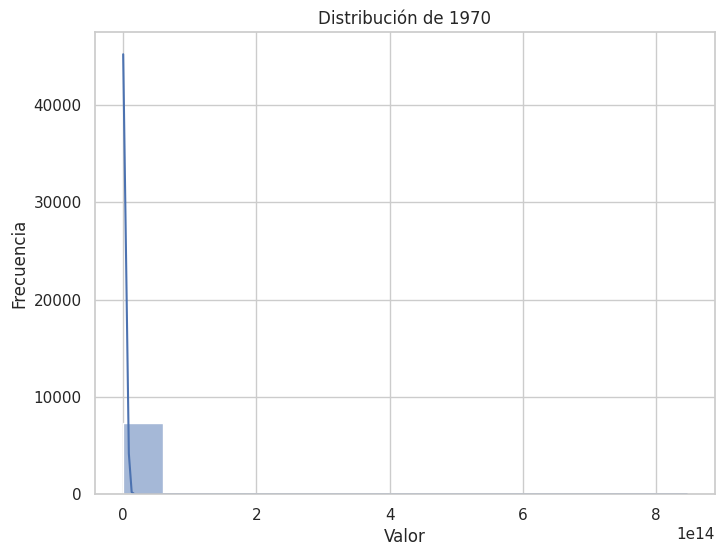

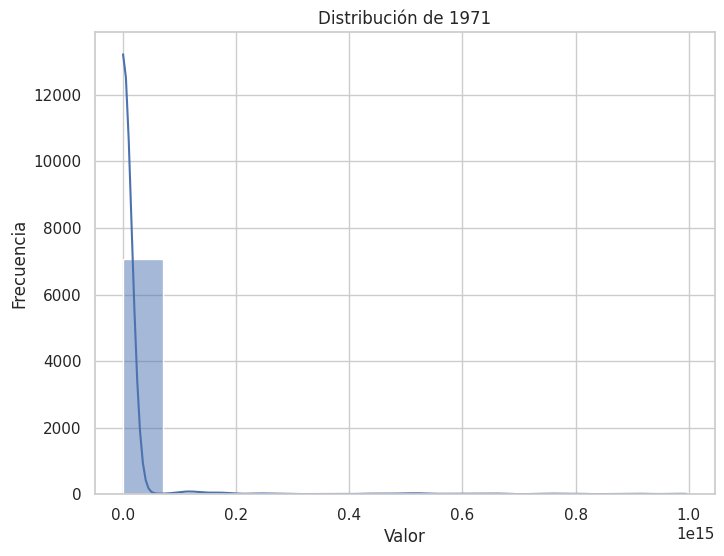

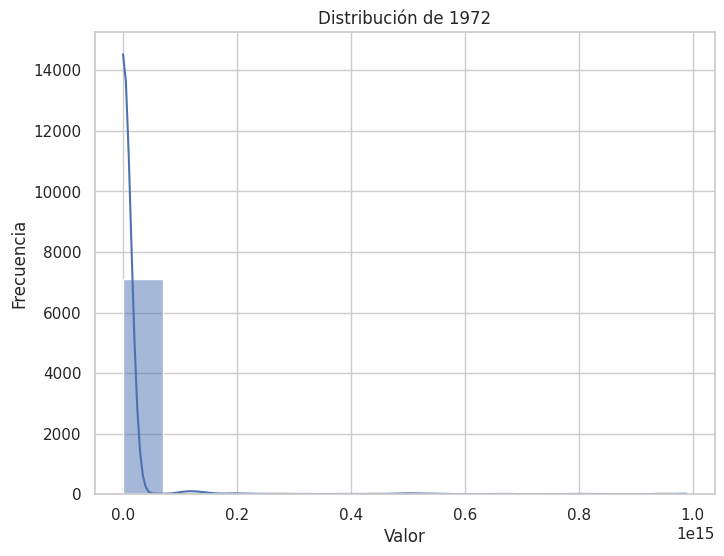

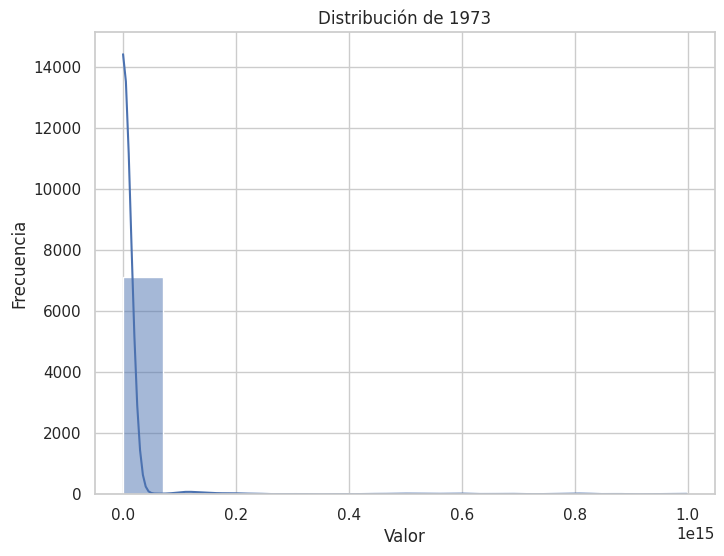

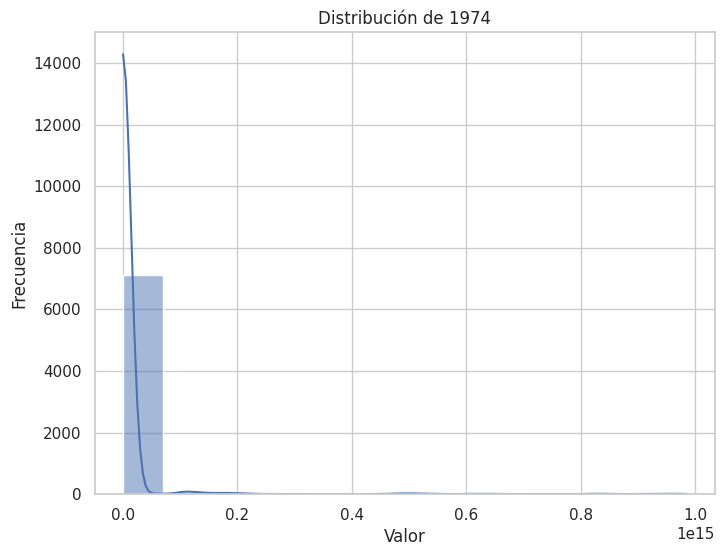

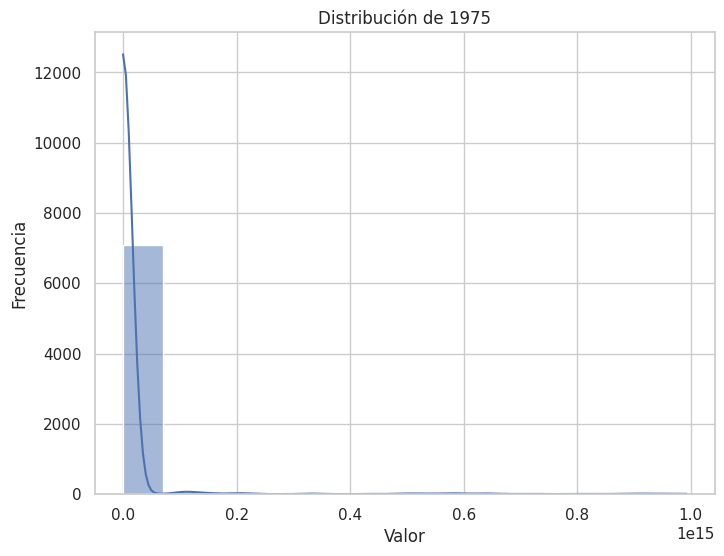

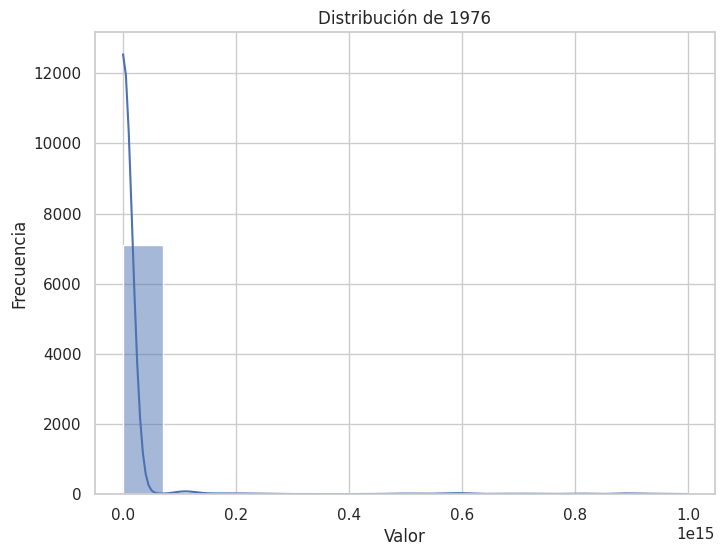

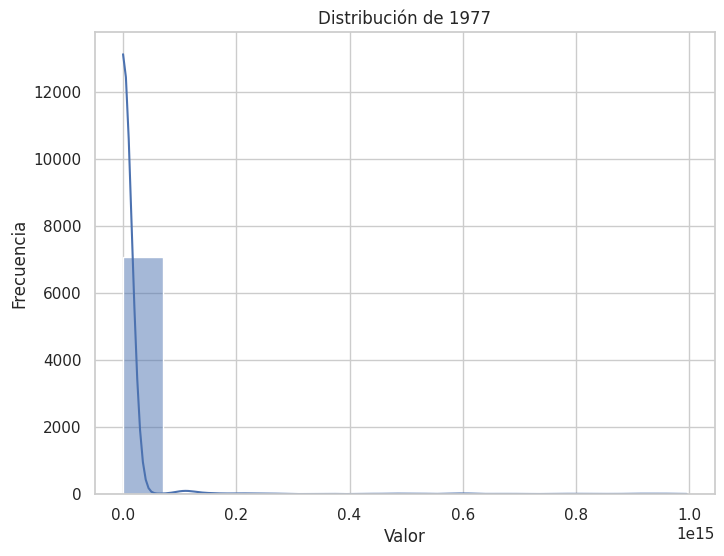

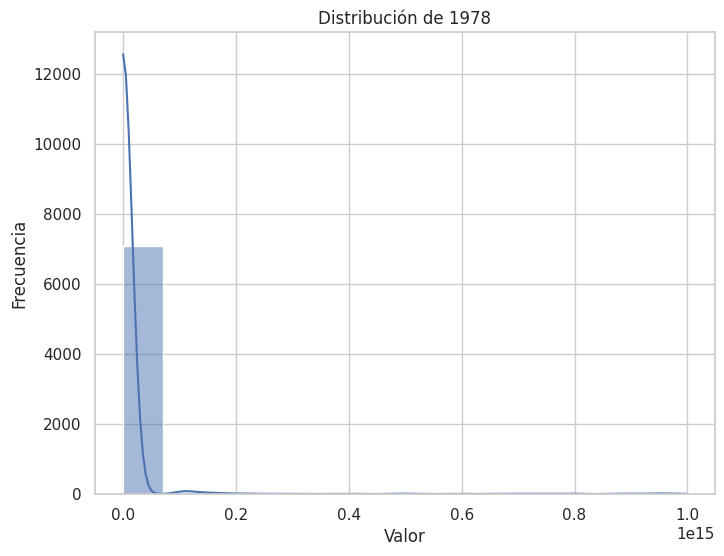

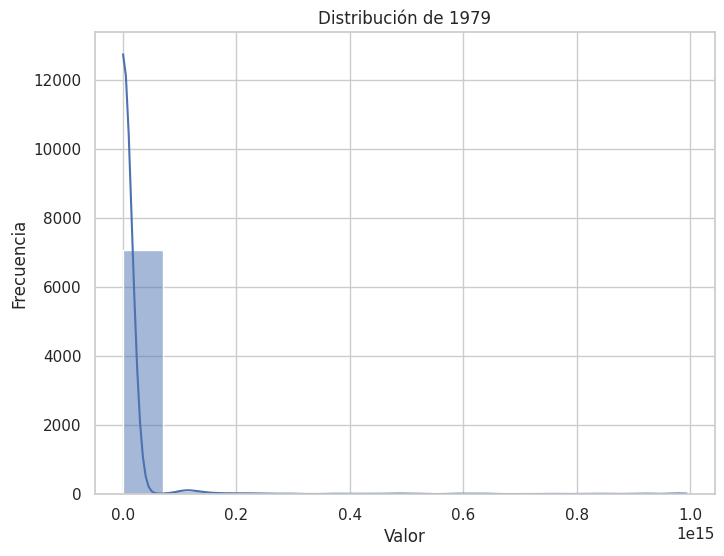

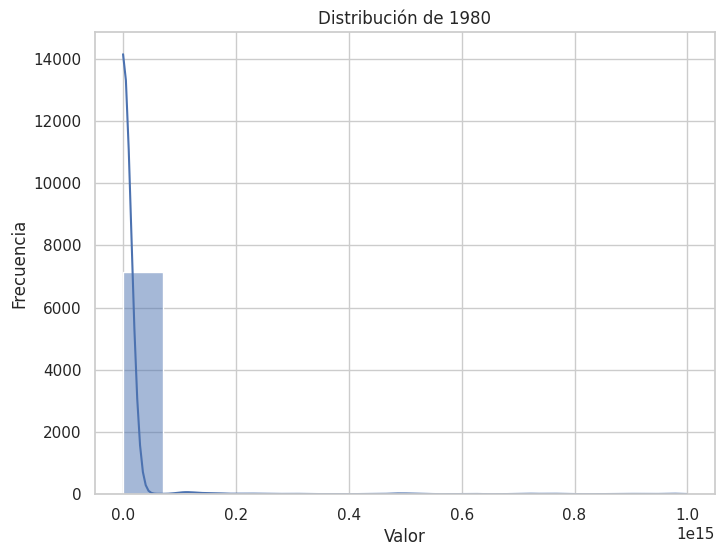

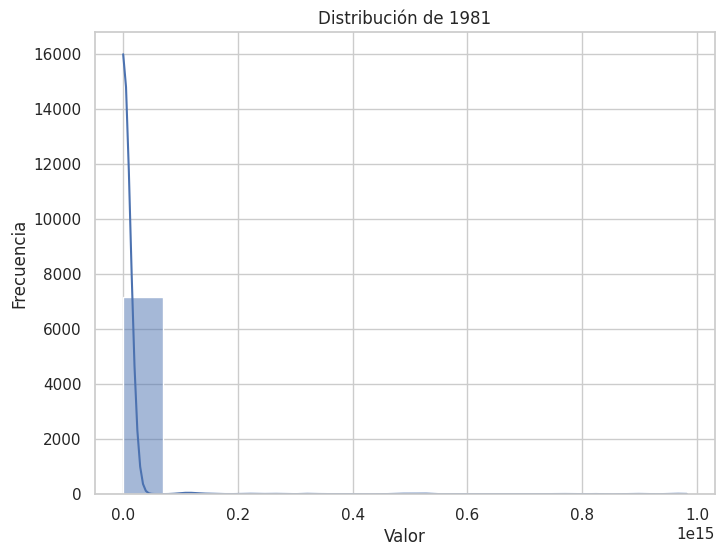

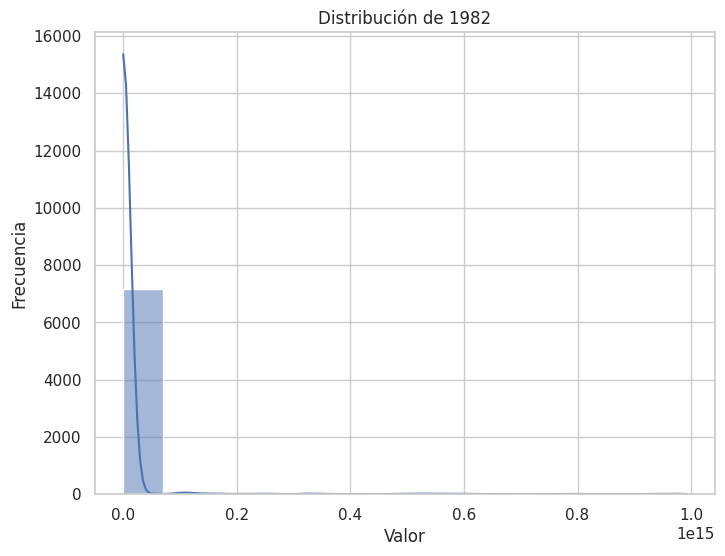

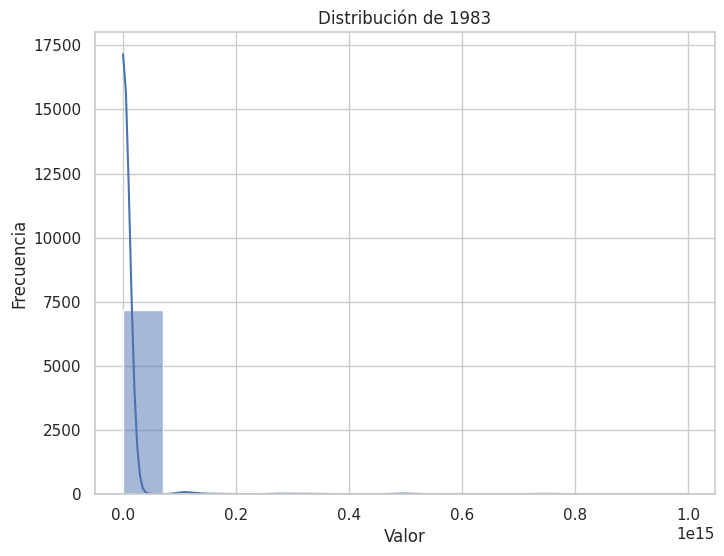

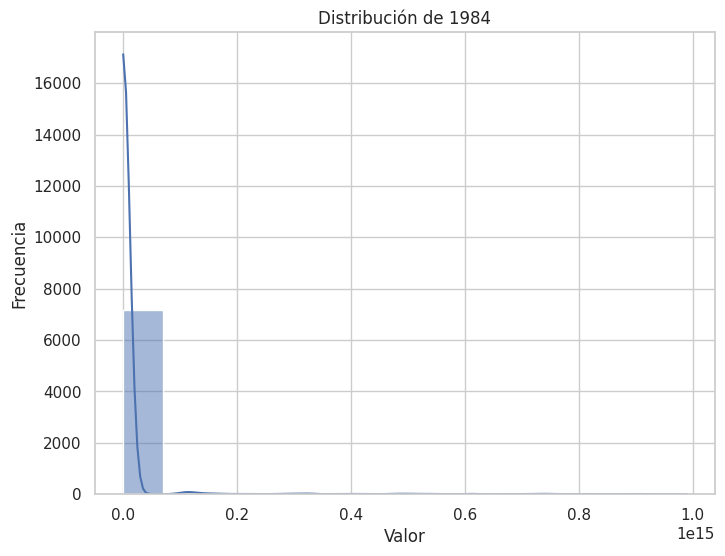

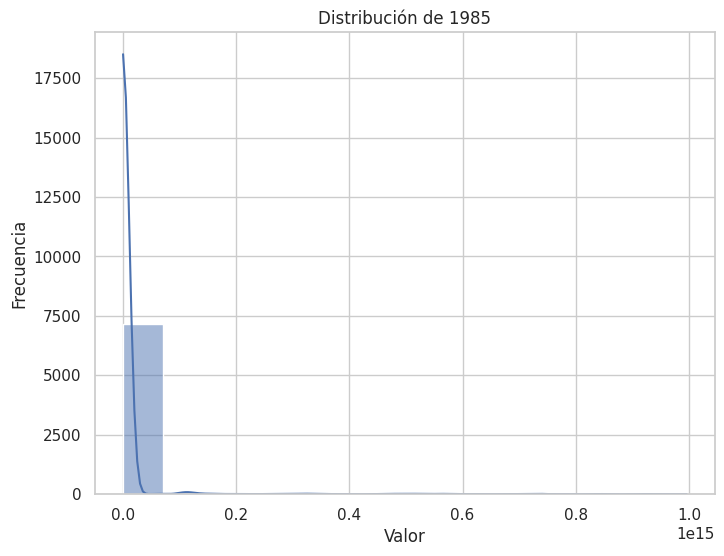

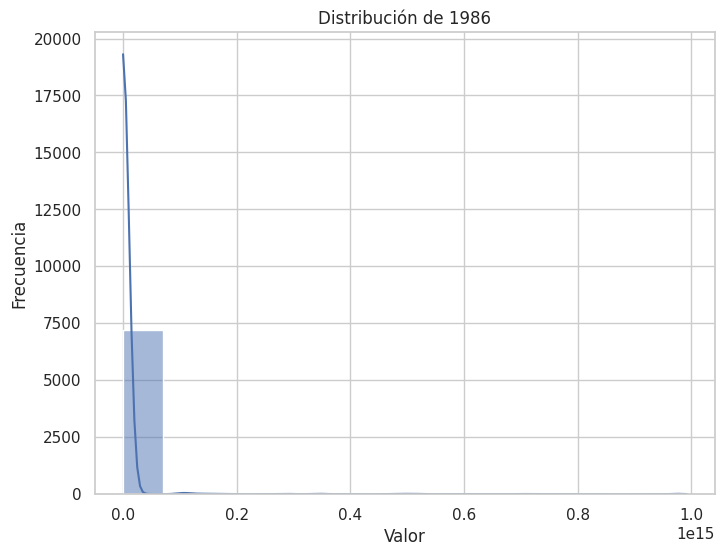

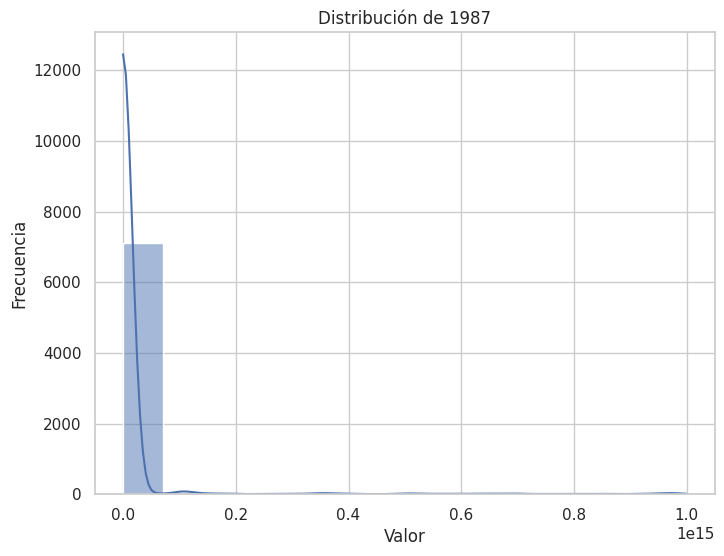

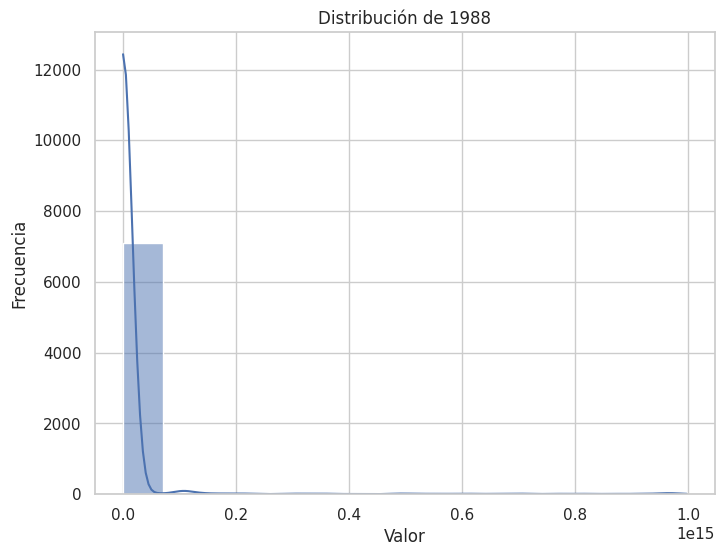

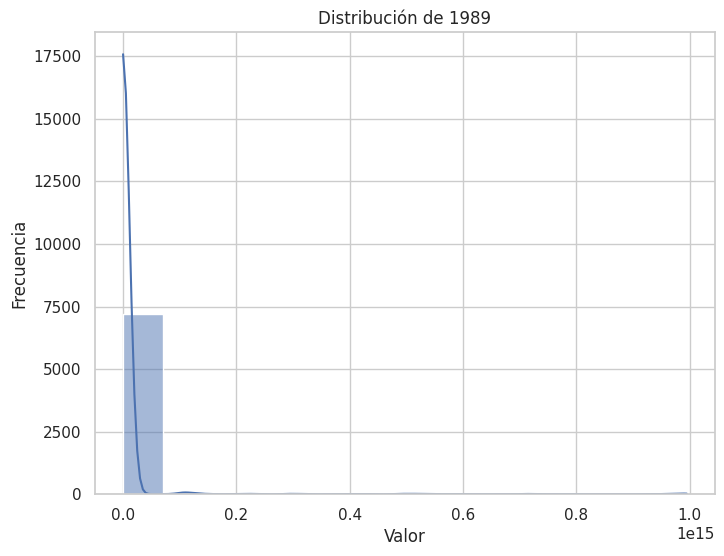

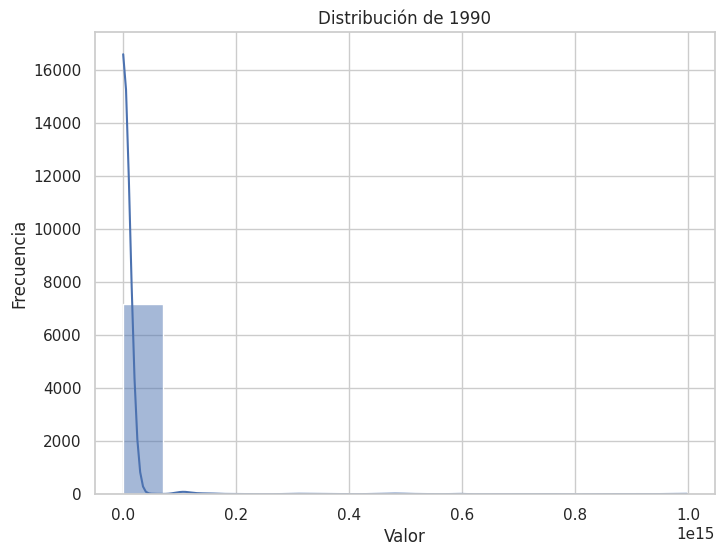

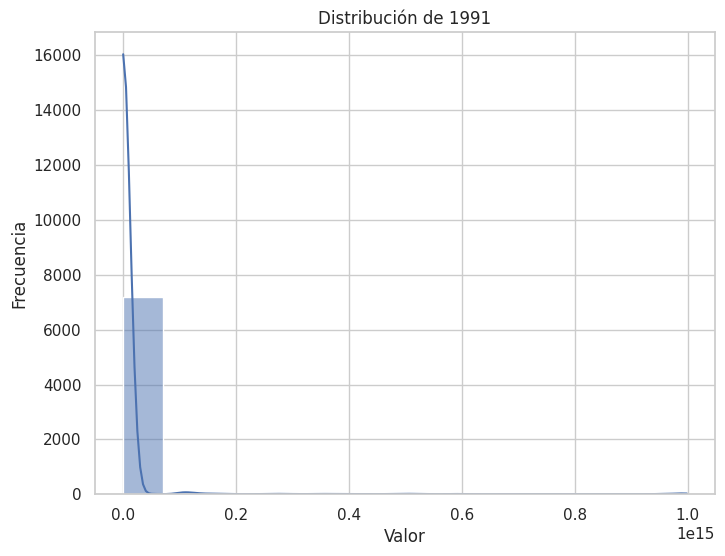

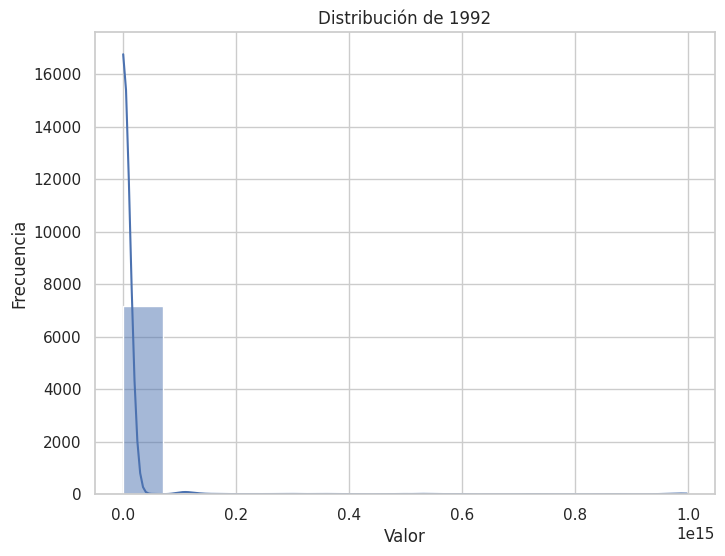

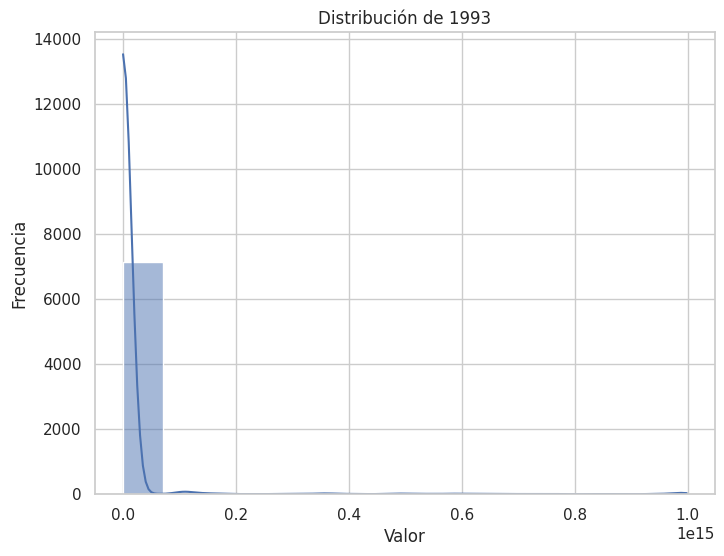

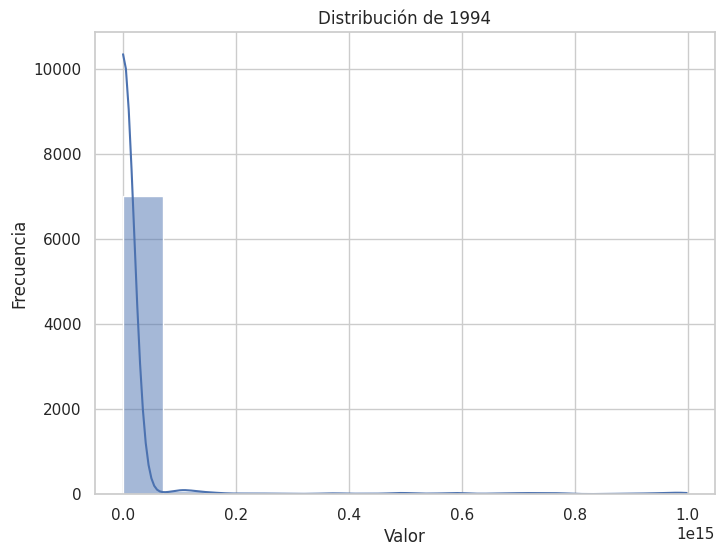

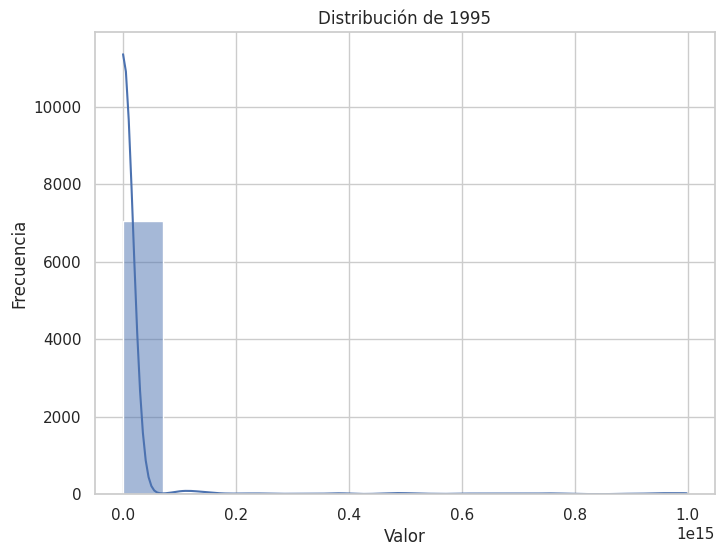

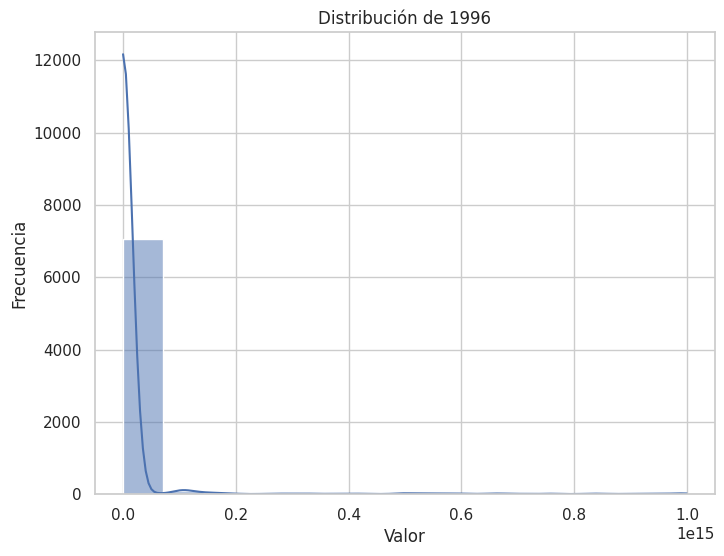

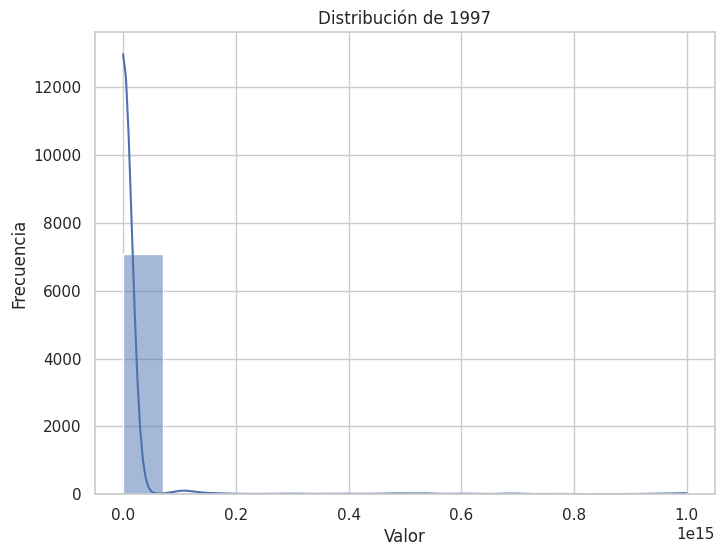

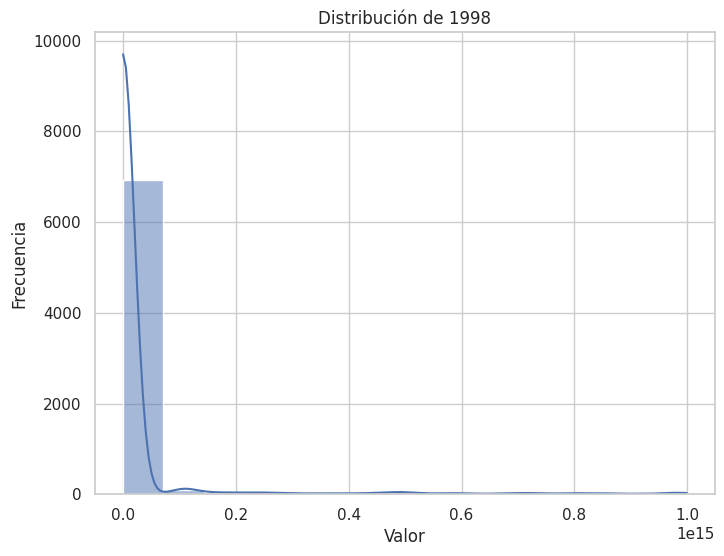

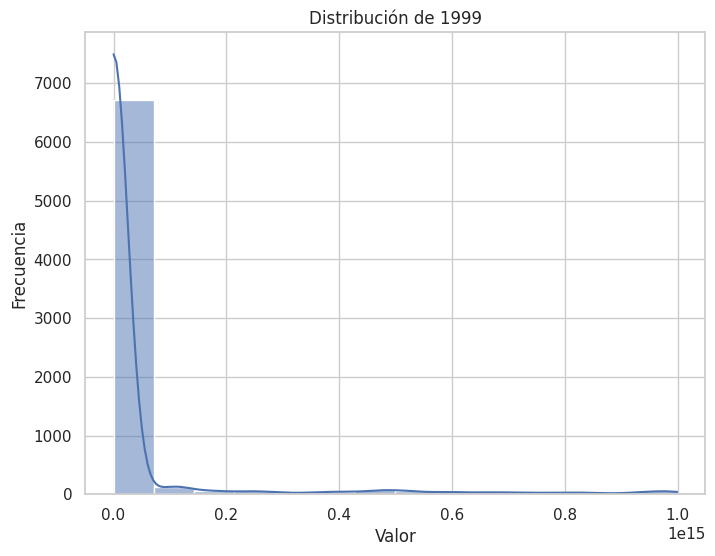

In [ ]:

# Visualizar los datos
sns.set(style="whitegrid")  # Estilo de la grilla

# Gráficos de distribución
for column in df.columns[4:]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficos de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 4:].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Gráficos de tendencia temporal
df_t = df.set_index('Country Name').drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1).T
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_t, dashes=False, palette='tab10')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Tendencia temporal de los indicadores por país')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# EDA
for columna in df.columns:
    if pd.api.types.is_numeric_dtype(df[columna]):
        # Generar gráfico de barras para la columna
        df[columna].plot(kind='bar')
        plt.title(f'Gráfico de barras - {columna}')
        plt.show()

        # Generar gráfico de líneas para la columna
        df[columna].plot(kind='line')
        plt.title(f'Gráfico de líneas - {columna}')
        plt.show()

        # Generar histograma para la columna
        df[columna].plot(kind='hist')
        plt.title(f'Histograma - {columna}')
        plt.show()

        # Generar tabla con estadísticas descriptivas
        tabla_estadisticas = df[columna].describe()
        print(f'Tabla de estadísticas - {columna}')
        print(tabla_estadisticas)
        print('---')



In [ ]:
import matplotlib.pyplot as plt

# Agrupa el DataFrame por 'Indicator Code'
grouped = df.groupby('Country Name')

# Itera sobre los grupos y crea un gráfico para cada uno
for indicator_code, group in grouped:
    plt.figure(figsize=(20, 15))

    # Establece el país en el eje x y los valores de las columnas en el eje y
    for column in group.columns[4:]:
        country = group['Indicator Code']
        values = pd.to_numeric(group[column], errors='coerce')
        plt.plot(country, values, label=column)

    # Personaliza el título y las etiquetas de los ejes
    plt.title('Crecimiento de indicadores por país: {}'.format(indicator_code))
    plt.xlabel('Indicadores')
    plt.ylabel('Valor')
    plt.legend()
    plt.xticks(rotation=90)

    # Muestra el gráfico
    plt.show()




Las filas que no se ejecutaron (se excluyen por el tamaño que implican en el cuaderno)

Adicional a este proyecto existen varias investigaciones que muestran una relación entre la educación y la criminalidad. Sin embargo, es importante destacar que la relación no es simple o directa, y existen muchos factores (MULTIFACTORIAL) que pueden influir en los resultados.

1. **Educación y oportunidades económicas**: La educación puede proporcionar a las personas habilidades y conocimientos que les permitan obtener mejores trabajos y tener mayores ingresos. (Escuela Politecnica Nacional) Al tener acceso a oportunidades económicas legales y bien remuneradas, la necesidad o el incentivo para involucrarse en actividades delictivas puede disminuir.

2. **Desarrollo de habilidades socioemocionales**: La educación también puede ayudar a las personas a desarrollar habilidades socioemocionales como la resolución de conflictos, el autocontrol y el respeto por los demás. Estas habilidades pueden ayudar a prevenir la participación en actividades delictivas. [NO PRESNETE EN EL DATASET]

3. **Desigualdad y exclusión social**: Las desigualdades en el acceso a la educación y la exclusión social pueden contribuir al aumento de la criminalidad. Por ejemplo, los individuos que se sienten excluidos del sistema educativo pueden ser más propensos a involucrarse en actividades delictivas.

4. **Impacto a largo plazo de la educación temprana**: Estudios también han demostrado que la intervención temprana en la educación puede tener un impacto significativo en la reducción de la criminalidad en la vida adulta.

5. **Normas sociales y valores**: La educación puede influir en las normas sociales y los valores, que a su vez pueden afectar los niveles de criminalidad.

6. El señoreaje puede influir en la economía de un país y, potencialmente, en su nivel de criminalidad, aunque la conexión no es tan directa como la que podría existir entre la educación y la criminalidad. Aquí te dejo algunas posibles formas en que el señoreaje podría influir indirectamente:

- **Inflación y estabilidad económica**: Si un gobierno abusa del señoreaje y emite demasiado dinero, puede causar inflación, lo que puede llevar a la inestabilidad económica. Esta inestabilidad económica puede aumentar los niveles de pobreza y desempleo, factores que a veces se asocian con mayores tasas de criminalidad.

- **Confianza en la moneda y en el gobierno**: Si el señoreaje lleva a la devaluación de la moneda y a la pérdida de confianza en su valor, puede debilitar la confianza en el gobierno y en las instituciones del país. Este debilitamiento puede aumentar el nivel de descontento y agitación social, lo cual podría a su vez aumentar la criminalidad.

- **Distribución de la riqueza**: El señoreaje puede afectar la distribución de la riqueza en un país. Si los beneficios del señoreaje se distribuyen de manera injusta, esto puede aumentar la desigualdad económica. La desigualdad económica puede ser un factor contribuyente a la criminalidad.


Es importante recordar que **aunque existe una correlación, no necesariamente significa que exista una relación de causa y efecto.**

Existen muchos factores que pueden influir en los niveles de criminalidad, incluyendo las políticas gubernamentales, la economía, la estructura social y la cultura. Sin embargo, la educación es un componente importante de cualquier estrategia para prevenir la criminalidad.

### Bibliografia

Lochner, L., Moretti, E., & Whinston, M. (2004). Education and crime: A review of the literature. In J. J. Heckman & A. B. Krueger (Eds.), Education, crime, and social mobility (pp. 183-263). Chicago, IL: University of Chicago Press.

The Justice Policy Institute. (2017). The school-to-prison pipeline: A comprehensive look at the relationship between school discipline and the criminal justice system. Washington, DC: Author.

National Bureau of Economic Research. (2012). A crime-education nexus: Evidence from the United States. Working Paper 18152.

Pew Research Center. (2018, December 10). Educational attainment and the criminal justice system. Washington, DC: Author.

Raphael, S. (2008). Education and crime: A review of the literature. Journal of Economic Literature, 46(1), 281-318.